<a href="https://colab.research.google.com/github/narennravi/CVIP-DS_Intern-phase1/blob/master/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is Diabetes ?**
> * Diabetes is the disease that occurs when the amount of glucose or blood sugar get's too high.

### **Types of Diabetes ?**
    1. Type I Diabetes
    2. Type II Diabetes

### **1. Type I Diabete:**

 > * In this type of diabetes body makes little or no insulin.
 > * Immune system attacks and destroy cells in pancreas that make insulin.
 > * Majorly diagnosed in children and young adults.


 ### **2. Type II Diabete:**
 > * In this type of diabetes body do not use insulin properly.
 > * These type of diabetes developed by overweight or family history of disease risk factors.
 > * Diagnosed at any age.

## **Summary of the columns**

>>  **gender:**
 * Gender refers to the classification of individuals as male or female. It is an important demographic factor that can influence various aspects of health and medical conditions.

>> **age:**
 * Age represents the number of years a person has lived since birth. It provides insight into the individual's life stage, potential health risks, and susceptibility to certain diseases or conditions associated with specific age groups.

>> **hypertension:**
 * Hypertension, often referred to as high blood pressure, is a medical condition characterized by persistently elevated blood pressure in the arteries. It is a significant risk factor for various cardiovascular diseases and can lead to serious health complications if left unmanaged.

>> **heart_disease:**
 * Heart disease refers to a range of conditions affecting the heart, such as coronary artery disease, heart failure, or heart rhythm disorders. It is a broad term encompassing various cardiovascular disorders that can impact the overall functioning of the heart.

>> **smoking_history:**
 * Smoking history indicates whether an individual has a past or present habit of smoking tobacco products. Smoking is a well-known risk factor for numerous health problems, including respiratory diseases, cardiovascular diseases, and certain types of cancer.

>> **bmi:**
 * Body Mass Index (BMI) is a measure of body fat based on an individual's weight and height. It provides an estimation of whether a person's weight is within a healthy range or if they are underweight, overweight, or obese. BMI is commonly used as a screening tool for assessing the risk of weight-related health issues.

>> **HbA1c_level:**
 *  HbA1c (Hemoglobin A1c) level is a laboratory test that measures the average blood sugar (glucose) levels over the past 2-3 months. It is commonly used in the diagnosis and management of diabetes. Higher HbA1c levels indicate poorer blood sugar control and may indicate the need for adjustments in diabetes treatment.

>> **blood_glucose_level:**
 *  Blood glucose level refers to the concentration of glucose (sugar) in the bloodstream. It is an important indicator of an individual's blood sugar regulation. Abnormal blood glucose levels, either too high (hyperglycemia) or too low (hypoglycemia), can be associated with various health conditions, particularly diabetes.

>> **diabetes:**
 * Diabetes is a chronic medical condition characterized by elevated blood sugar levels due to insufficient insulin production or ineffective use of insulin in the body. It requires careful management and monitoring of blood sugar levels to prevent complications. Diabetes can have significant impacts on overall health and may require lifestyle modifications, medication, and regular medical care.

Importing necessary Libraries

In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
from math import ceil

import warnings
warnings.filterwarnings('ignore')

Reading CSV file

In [98]:
data = pd.read_csv('/content/diabetes_prediction_dataset.csv')

# **Data Preprocessing**

In [99]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [100]:
# info --> Display Column, non-null, Data-type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [101]:
# column --> Represents all column name

data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [102]:
# shape --> Represents number of rows, columns

data.shape

(100000, 9)



*  Entire Diabetes Dataset contains:
         * 1 lakh - records/rows
         * 9 - columns




Diabetes is the target variable being predicted where values of:
   >* 1 ----> presence of diabetes
   >* 0 ----> other possibilities

In [103]:
# NULL ---> checking for null values

data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


> * We don't have any NULL-values

In [104]:
# head --> represents first 5-data set

data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


import numpy as np
from google.colab import autoviz
df_7757429448767257704 = autoviz.get_registered_df('df_7757429448767257704')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7757429448767257704, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6691568461496217165 = autoviz.get_registered_df('df_6691568461496217165')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6691568461496217165, *['hypertension'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8940631246829356202 = autoviz.get_registered_df('df_8940631246829356202')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8940631246829356202, *['heart_disease'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8754909512576328899 = autoviz.get_registered_df('df_8754909512576328899')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8754909512576328899, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1224540711085767684 = autoviz.get_registered_df('df_1224540711085767684')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1224540711085767684, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7263007874842409206 = autoviz.get_registered_df('df_7263007874842409206')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7263007874842409206, *['hypertension'], **{})
chart

import numpy as np
from google.colab import autoviz
df_631677542286267085 = autoviz.get_registered_df('df_631677542286267085')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_631677542286267085, *['heart_disease'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7426144210787162996 = autoviz.get_registered_df('df_7426144210787162996')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7426144210787162996, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7681785072471742490 = autoviz.get_registered_df('df_7681785072471742490')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_7681785072471742490, *['gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2325081045827826936 = autoviz.get_registered_df('df_2325081045827826936')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2325081045827826936, *['smoking_history'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6608151015115428160 = autoviz.get_registered_df('df_6608151015115428160')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6608151015115428160, *[[['age', 'hypertension'], ['hypertension', 'heart_disease'], ['heart_disease', 'bmi'], ['bmi', 'HbA1c_level']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_1974030772908257321 = autoviz.get_registered_df('df_1974030772908257321')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_1974030772908257321, *['gender', 'smoking_history'], **{})
chart

import numpy as np
from google.colab import autoviz
df_274711543190498387 = autoviz.get_registered_df('df_274711543190498387')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_274711543190498387, *['age', 'gender'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1449899823682015169 = autoviz.get_registered_df('df_1449899823682015169')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1449899823682015169, *['age', 'smoking_history'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4208838088314201873 = autoviz.get_registered_df('df_4208838088314201873')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4208838088314201873, *['hypertension', 'gender'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3181474429466814956 = autoviz.get_registered_df('df_3181474429466814956')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3181474429466814956, *['hypertension', 'smoking_history'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6274409105380529284 = autoviz.get_registered_df('df_6274409105380529284')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6274409105380529284, *['hypertension', 'age', 'gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6731614951090127683 = autoviz.get_registered_df('df_6731614951090127683')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6731614951090127683, *['hypertension', 'age', 'smoking_history'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3560242110769296422 = autoviz.get_registered_df('df_3560242110769296422')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3560242110769296422, *['hypertension', 'heart_disease', 'gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4643262460655589570 = autoviz.get_registered_df('df_4643262460655589570')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4643262460655589570, *['hypertension', 'heart_disease', 'smoking_history'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5285564241232960105 = autoviz.get_registered_df('df_5285564241232960105')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5285564241232960105, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6316442512784123024 = autoviz.get_registered_df('df_6316442512784123024')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6316442512784123024, *['hypertension'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2456359356993668811 = autoviz.get_registered_df('df_2456359356993668811')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2456359356993668811, *['heart_disease'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3749603170458817179 = autoviz.get_registered_df('df_3749603170458817179')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3749603170458817179, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8199909750912881386 = autoviz.get_registered_df('df_8199909750912881386')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8199909750912881386, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6091765102872250358 = autoviz.get_registered_df('df_6091765102872250358')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6091765102872250358, *['hypertension'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5861210405030154317 = autoviz.get_registered_df('df_5861210405030154317')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5861210405030154317, *['heart_disease'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8394569033228676218 = autoviz.get_registered_df('df_8394569033228676218')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8394569033228676218, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9159852163978165092 = autoviz.get_registered_df('df_9159852163978165092')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_9159852163978165092, *['gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1663919364204425990 = autoviz.get_registered_df('df_1663919364204425990')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1663919364204425990, *['smoking_history'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5324425619358822443 = autoviz.get_registered_df('df_5324425619358822443')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5324425619358822443, *[[['age', 'hypertension'], ['hypertension', 'heart_disease'], ['heart_disease', 'bmi'], ['bmi', 'HbA1c_level']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8566052119174546693 = autoviz.get_registered_df('df_8566052119174546693')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_8566052119174546693, *['gender', 'smoking_history'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5976165406287587280 = autoviz.get_registered_df('df_5976165406287587280')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5976165406287587280, *['age', 'gender'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2986385306104576959 = autoviz.get_registered_df('df_2986385306104576959')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2986385306104576959, *['age', 'smoking_history'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7542156447505153638 = autoviz.get_registered_df('df_7542156447505153638')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7542156447505153638, *['hypertension', 'gender'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2016299174356161070 = autoviz.get_registered_df('df_2016299174356161070')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2016299174356161070, *['hypertension', 'smoking_history'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_112200327737798321 = autoviz.get_registered_df('df_112200327737798321')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_112200327737798321, *['hypertension', 'age', 'gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6021376650780091969 = autoviz.get_registered_df('df_6021376650780091969')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6021376650780091969, *['hypertension', 'age', 'smoking_history'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1367752598731345023 = autoviz.get_registered_df('df_1367752598731345023')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1367752598731345023, *['hypertension', 'heart_disease', 'gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1692010894601115379 = autoviz.get_registered_df('df_1692010894601115379')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1692010894601115379, *['hypertension', 'heart_disease', 'smoking_history'], **{})
chart

# **EDA (Exploratory Data Analysis):**

## 1. Gender Feature:

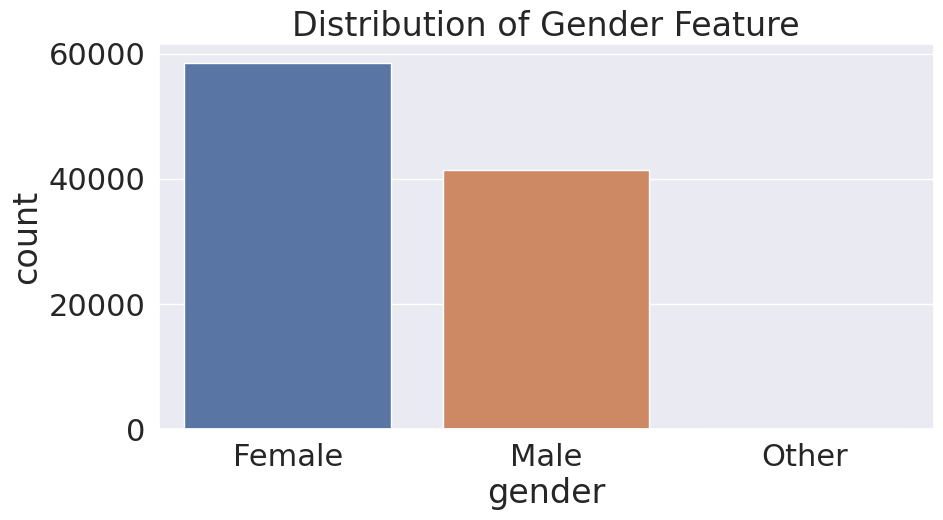

In [105]:
from numpy.random import random_sample
plt.figure(figsize=(10,5))
sns.set(font_scale=2)
sns.countplot(x='gender',data=data);
plt.title("Distribution of Gender Feature");

In [106]:
data.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

Gender classification:
   > * Male --> 58552
   > * Female --> 41430
   > * Other --> 18

### Gender Feature based on Smoking history:

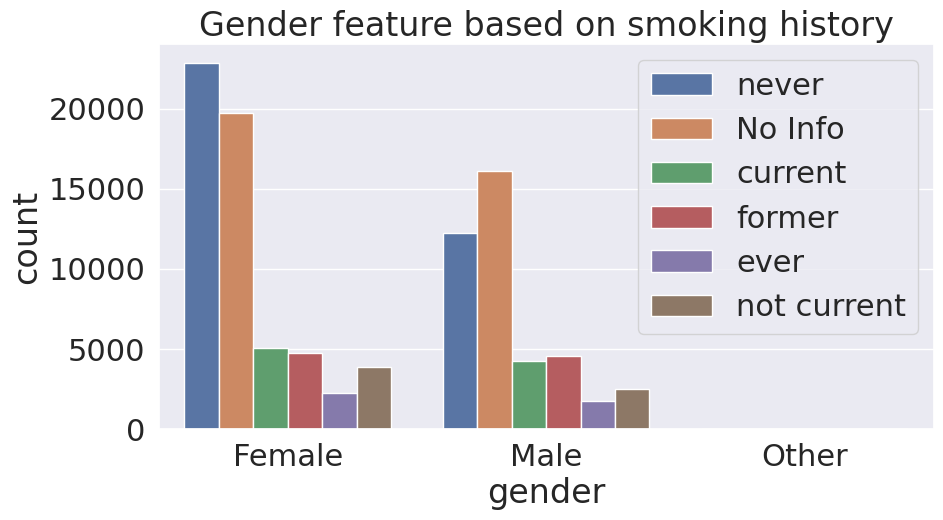

In [107]:
plt.figure(figsize=(10,5));
sns.set(font_scale=2)
sns.countplot(x='gender',data=data,hue='smoking_history');
plt.legend(loc="upper right");
plt.title("Gender feature based on smoking history");

### Distribution of Gender (based on smoking history):

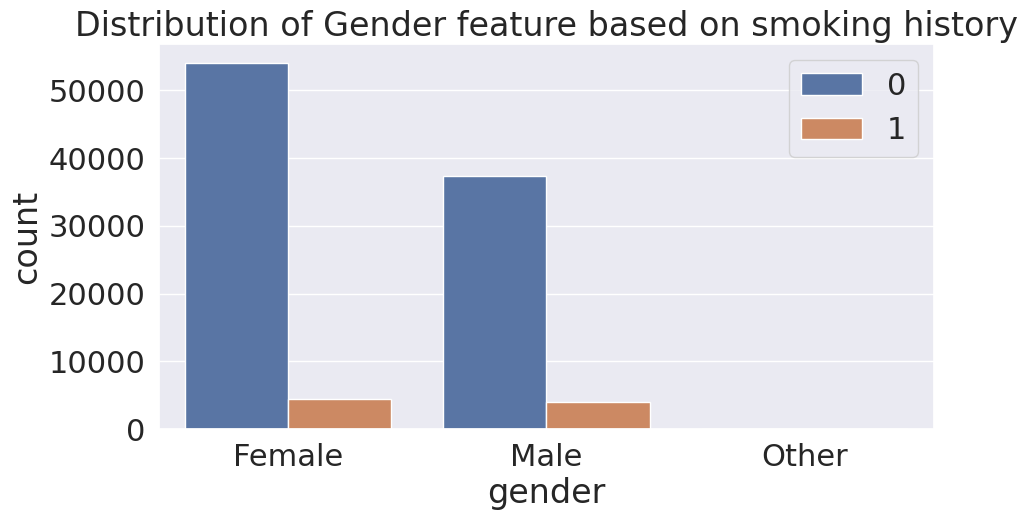

In [108]:
plt.figure(figsize=(10,5));
sns.countplot(x='gender',data=data,hue='diabetes');
plt.legend(loc="upper right");
plt.title("Distribution of Gender feature based on smoking history");

* Assuming Diabetes affected person as "1"

In [109]:
# Filter the data where 'diabetes' is 1

diabetes_data = data[data['diabetes'] == 1]

### Distribution of Diabetes Affected - count:

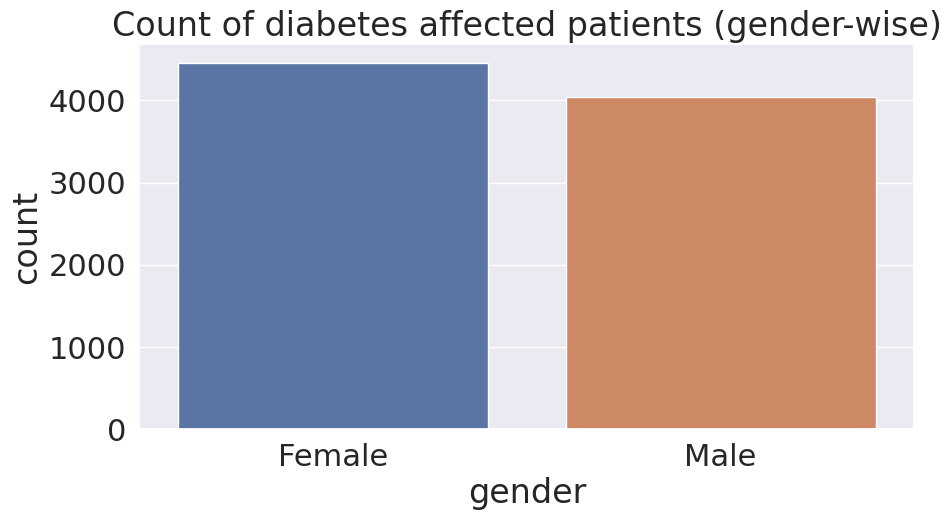

In [110]:
plt.figure(figsize=(10,5));
sns.countplot(x='gender', data=diabetes_data)
plt.title("Count of diabetes affected patients (gender-wise)");

> * According to the graph above:
    >> * female patients > male patients.



## 2. Age Feature

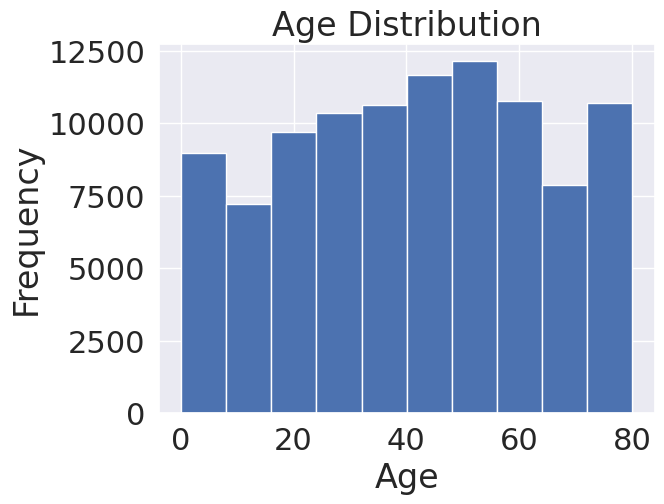

In [111]:
plt.hist(data['age']);

# Set the plot title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## 3. Hypertension Feature

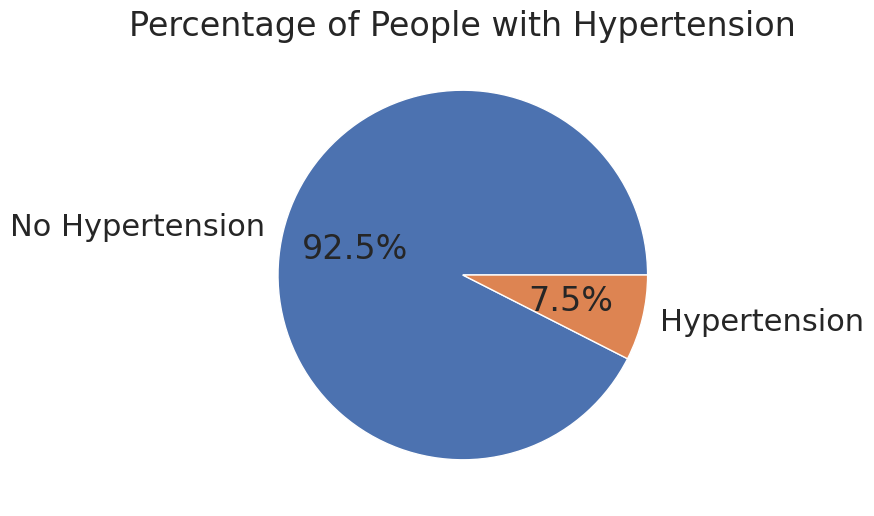

In [112]:
# Count the number of hypertension values
hypertension_counts = data['hypertension'].value_counts()

# Calculate the percentage of people with hypertension
hypertension_percentage = hypertension_counts / len(data) * 100

# Create a pie chart
plt.figure(figsize=(10,6))
labels = ['No Hypertension', 'Hypertension']
plt.pie(hypertension_percentage, labels=labels, autopct='%1.1f%%')

# Set the plot title
plt.title('Percentage of People with Hypertension')

# Display the plot
plt.show()

## 4. Heart Disease Feature

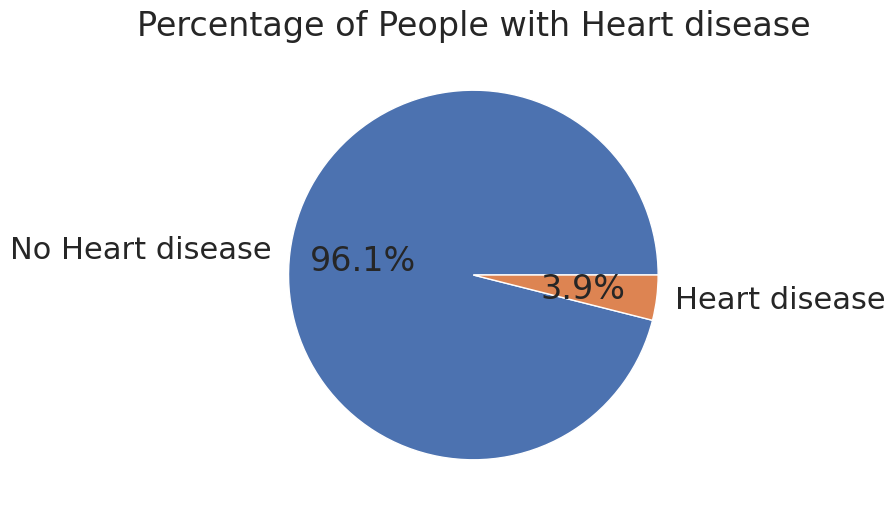

In [113]:
# Count the number of Heart disease values
heart_disease_counts = data['heart_disease'].value_counts()

# Calculate the percentage of people with heart disease
heart_disease_percentage = heart_disease_counts / len(data) * 100

# Create a pie chart
plt.figure(figsize=(10,6))
labels = ['No Heart disease', 'Heart disease']
plt.pie(heart_disease_percentage, labels=labels, autopct='%1.1f%%')

# Set the plot title
plt.title('Percentage of People with Heart disease')

# Display the plot
plt.show()

## 5. Smoking Histroy Feature

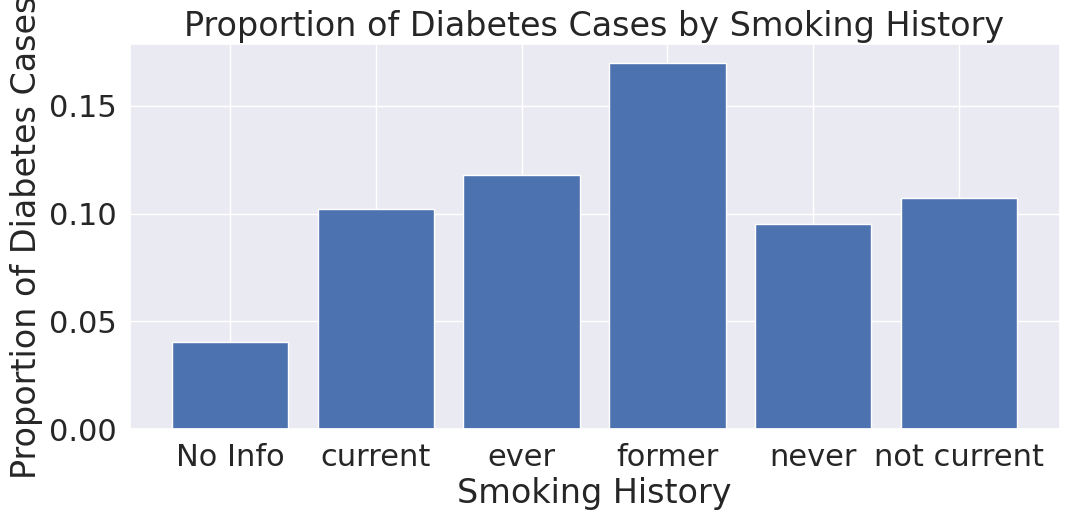

In [114]:
# Grouping smoking history & diabetes
grouped_data = data.groupby('smoking_history')['diabetes'].mean()

# Create a bar plot
plt.figure(figsize=(12,5))
plt.bar(grouped_data.index, grouped_data.values)

# Set the plot title and labels
plt.title('Proportion of Diabetes Cases by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Proportion of Diabetes Cases')

# Display the plot
plt.show()

## 6. BMI

In [115]:
data['bmi'].describe()

count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

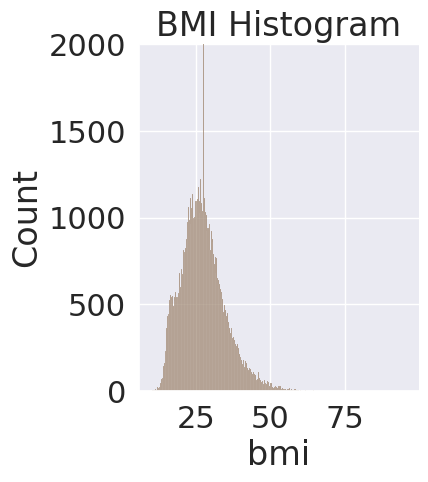

In [116]:
import seaborn as sns

ax = sns.displot(data=data, x='bmi', color = sns.color_palette()[5])
plt.ylim((0, 2000))
ax.set(title='BMI Histogram')

In [117]:
data.bmi.value_counts()

27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: bmi, Length: 4247, dtype: int64

In [118]:
data.bmi.value_counts(normalize=True).head(10)*100

27.32    25.495
23.00     0.103
27.12     0.101
27.80     0.100
24.96     0.100
22.40     0.099
25.00     0.099
25.60     0.098
26.70     0.094
24.50     0.094
Name: bmi, dtype: float64

## 7. HbA1c_level

In [119]:
data['HbA1c_level'].describe()

count    100000.000000
mean          5.527507
std           1.070672
min           3.500000
25%           4.800000
50%           5.800000
75%           6.200000
max           9.000000
Name: HbA1c_level, dtype: float64

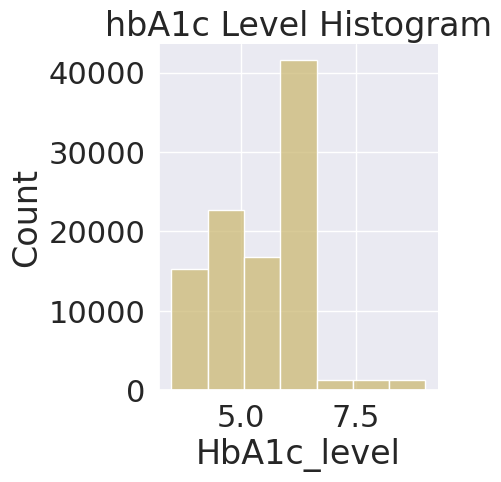

In [120]:
ax = sns.displot(data=data, x='HbA1c_level', color = sns.color_palette()[8], bins=7)
ax.set(title='hbA1c Level Histogram')

In [121]:
data['HbA1c_level'].value_counts

<bound method IndexOpsMixin.value_counts of 0        6.6
1        6.6
2        5.7
3        5.0
4        4.8
        ... 
99995    6.2
99996    6.5
99997    5.7
99998    4.0
99999    6.6
Name: HbA1c_level, Length: 100000, dtype: float64>

In [122]:
data['HbA1c_level'].value_counts(normalize=True)*100

6.6    8.540
5.7    8.413
6.5    8.362
5.8    8.321
6.0    8.295
6.2    8.269
6.1    8.048
3.5    7.662
4.8    7.597
4.5    7.585
4.0    7.542
5.0    7.471
8.8    0.661
8.2    0.661
9.0    0.654
7.5    0.643
6.8    0.642
7.0    0.634
Name: HbA1c_level, dtype: float64

## 8. Blood Glucose Level

In [123]:
data['blood_glucose_level'].describe()

count    100000.000000
mean        138.058060
std          40.708136
min          80.000000
25%         100.000000
50%         140.000000
75%         159.000000
max         300.000000
Name: blood_glucose_level, dtype: float64

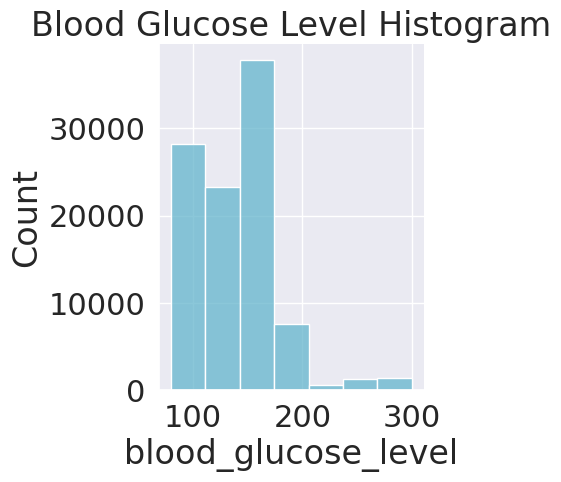

In [124]:
ax = sns.displot(data=data, x='blood_glucose_level', color = sns.color_palette()[9], bins=7)
ax.set(title='Blood Glucose Level Histogram')

In [125]:
data['blood_glucose_level'].skew()

0.8216549517517585

# **Splitting Data**

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X = data.drop('diabetes',axis=1)
y = data.diabetes

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [129]:
X_train.shape,X_test.shape

((70000, 8), (30000, 8))

# **Data Encoding**

1. Encoding for Gender:

In [130]:
# Function to determine encoder - gender

def encode_gender(label):
    if label == 'Female':
        return 0
    elif label == 'Male':
        return 1
    else:
        return 2

In [131]:
X_train.gender = X_train.gender.apply(encode_gender)
X_test.gender = X_test.gender.apply(encode_gender)

2. Encoding for smoking-history:

In [132]:
# Function to determine encoder - smoking-history

def encoder_smoking(label):
    if label == 'No Info':
        return 0
    elif label == 'never':
        return 1
    elif label == 'former':
        return 2
    elif label == 'current':
        return 3
    elif label == 'not current':
        return 4
    else:
        return 5

In [133]:
X_train['smoking_history'] = X_train['smoking_history'].apply(encoder_smoking)
X_test['smoking_history'] = X_test['smoking_history'].apply(encoder_smoking)

## **Feature selection**

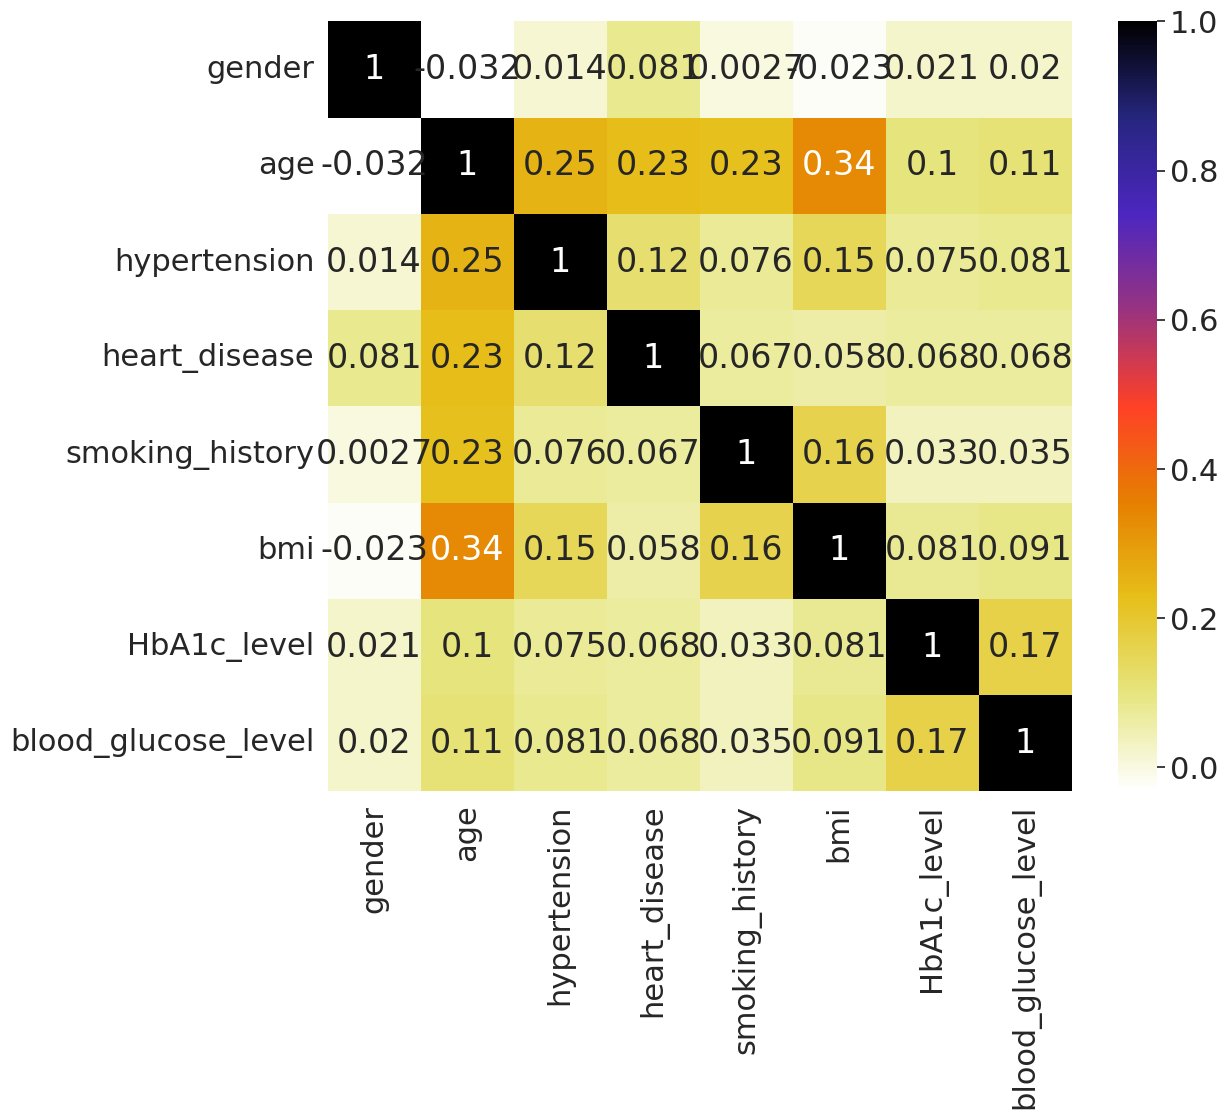

In [134]:
# Checking for Correlation using heatmap

plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r);
plt.show();

> * Through heatmap, we conclude that no-feature is highly correlated to each other

Variance Threshold:

In [135]:
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [136]:
const_cols = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]

In [137]:
const_cols

[]

>> * After using VarianceThreshold on training dataset we can say that there is no feature with low variance.

## **Checking for Im-blanced dataset:**

### ***Imbalanced - dataset***:-
* ###     one class or category has a much larger number of instances than the other class in the dataset.

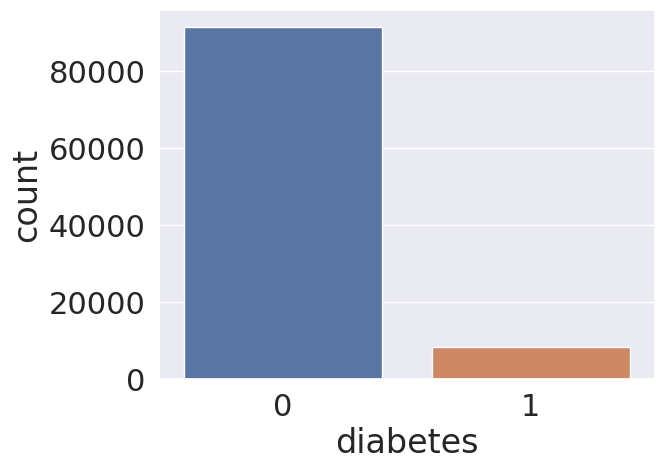

In [138]:
sns.countplot(x='diabetes',data=data);

* ### Since our dataset is imbalanced based on count plot.





### ***Over-sampling Technique (SMOTE) :-***




1.   SMOTE (Synthetic Minority Over-sampling Technique) is a popular oversampling technique used to address class imbalance in a dataset.
2.   SMOTE helps to address the issue of class imbalance by increasing the number of instances in the minority class



In [139]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
X_over, y_over = oversampler.fit_resample(X_train, y_train)

In [140]:
X_over.shape,y_over.shape

((128204, 8), (128204,))

### ***Scaling Data:-***

In [141]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()


# Fit the scaler on the training data and transform both training and testing data
X_over_scaled = scalar.fit_transform(X_over)
X_test_scaled = scalar.transform(X_test)

In [142]:
X_over_scaled.shape, X_test_scaled.shape

((128204, 8), (30000, 8))

# **Training Model using ML-Algorithms**

In [143]:
model_names = []
accuracies = []

## **1. Logistic Regression**

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [145]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_over_scaled,y_over)
model_names.append('Logistic Regression')
accuracies.append(ceil(log_reg.score(X_test_scaled,y_test)*100))
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93     27398
           1       0.42      0.86      0.56      2602

    accuracy                           0.88     30000
   macro avg       0.70      0.87      0.75     30000
weighted avg       0.94      0.88      0.90     30000



## **2. k nearest neighbour (KNN - Classification)**

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [147]:
accuracy_rate = []
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_over_scaled,y_over,cv=3)
    accuracy_rate.append(score.mean())

> ***Choosing K value:***

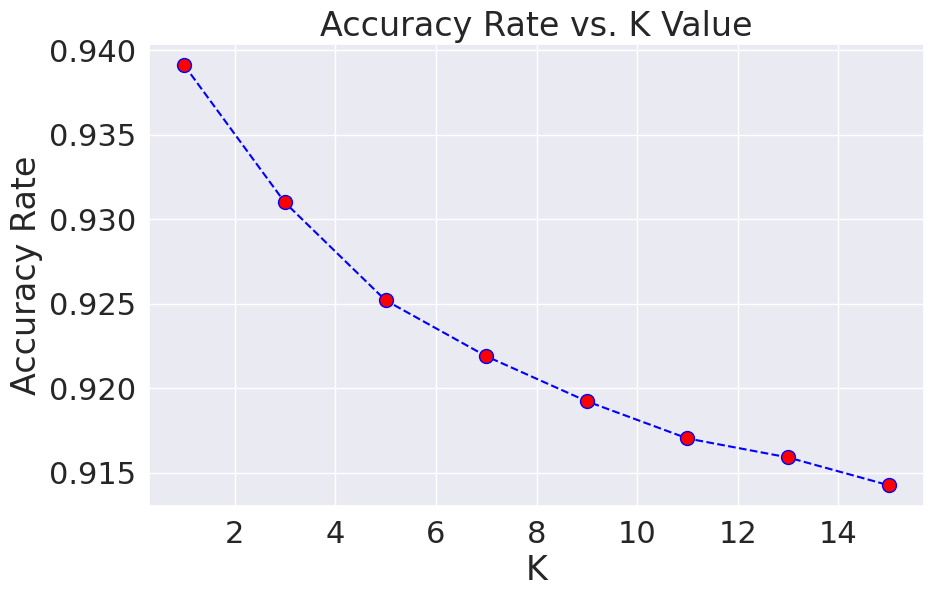

In [148]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16,2),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K');
plt.ylabel('Accuracy Rate');

In [149]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_over_scaled,y_over)
model_names.append('KNeighborsClassifier')
accuracies.append(ceil(knn.score(X_test_scaled,y_test)*100))
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     27398
           1       0.60      0.72      0.65      2602

    accuracy                           0.93     30000
   macro avg       0.79      0.84      0.81     30000
weighted avg       0.94      0.93      0.94     30000



## **3. Decision Tree**

In [150]:
parameter = {
    'criterion':["gini", "entropy", "log_loss"],
    'splitter' :["best", "random"],
    'max_depth':[1,2,3,4,5],
    'max_features':["auto", "sqrt", "log2"],
    'ccp_alpha':[1,2,3,4,5,6,7]
}

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [152]:
treemodel = DecisionTreeClassifier(max_depth=2)
cv = GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [153]:
cv.fit(X_over_scaled,y_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [154]:
cv.best_params_

{'ccp_alpha': 1,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [155]:
y_pred = cv.predict(X_test_scaled)

In [156]:
model_names.append('Decision Tree')
accuracies.append(ceil(cv.score(X_test_scaled,y_test)*100))

In [157]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27398
           1       0.00      0.00      0.00      2602

    accuracy                           0.91     30000
   macro avg       0.46      0.50      0.48     30000
weighted avg       0.83      0.91      0.87     30000



## **Models used and their accuracy**

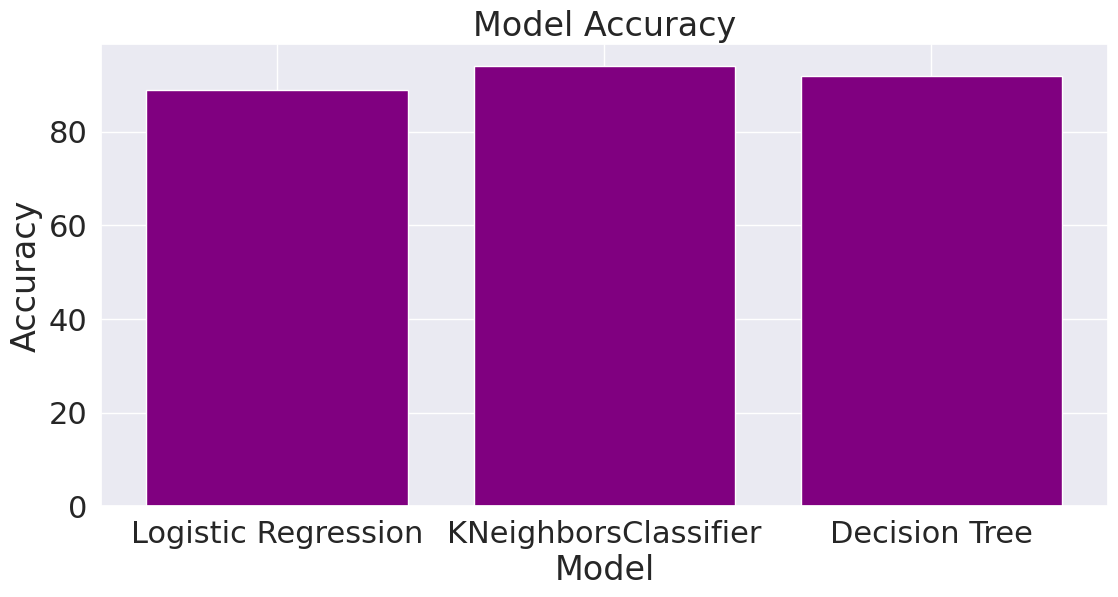

In [158]:
plt.figure(figsize=(13,6));
plt.bar(model_names, accuracies, color='purple');

# Set the plot title and labels
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the plot
plt.show()

### **From above plot we conclude:**
> * **KNN** is the winner and has the "highest accuracy".
> * Compared to Logistic Regression & Decision tree -->"KNN has highest prediction rate for Diabetes occurence".